<a href="https://colab.research.google.com/github/RazerRaymond/MachineLearningPS/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Twitter Data 🐦

## Analyzing Twitter Data

We start with importing the package into the notebook or the python program.

In [ ]:
import twitter

We then will then import a few other packages that will be needed throughout the homework

In [ ]:
import sys
import re, string

### API Key (Expired)

In [ ]:
api = twitter.Api(consumer_key='''zoU4PP7v1iS410r34h6embtHj''',
                  consumer_secret='''UlMtBwvtYKZsJMQA2KgDf8LW5wkC0XYf2CksTmvedGUjbvYnQj''',
                  access_token_key='''1228020474837446656-lKKavEt2L1tOCJHs5mNJG6u9GQ7RwG''',
                  access_token_secret='''NyNzPKw8pqowCX16sTjTOcKaWimE38RZA2GLvtrSru57O''',
                  sleep_on_rate_limit=True)

## Data Fetching procedure

In [ ]:
# This function will take in a search term and run through the twitter API to find
# the most recent tweets using that search term!

def searchTerm(searchTerm):
    
    # These two variables are used to keep track of calls made to the API
    untilID = sys.maxsize
    ids = []
    processedResults = []
    
    # Create a while loop that runs as long as the length of processedResults is under 100
    
    while (len(processedResults) < 100):
        
    
        # Call the getResults function, passing in the searchTerm as well as untilID
        
        # your code here
        results = getResults(searchTerm, untilID)
        
        # Create a loop going through each result in results. 
        #
        # Run preProcess on each result: if the returned value is not None, append the result and result.id
        # to their respective lists
        
        
        for r in results:
            if(preProcess(r) != None):
                ids.append(r.id)
                processedResults.append(r.text)
        

        
        untilID = max(ids)
    return processedResults

In [ ]:
# This function will take the search term and return a list of tweet words

def getResults(searchTerm, untilID):

    #     term: string, the term that is being searched
    #     since: string in format 'YYYY-MM-DD' which will serve as the earliest date
    #     until: string in format 'YYYY-MM-DD' which will serve as the latest data 
    #     count: int, the number of tweets to return, max of 100
    #     result_type: string, type of sorting for tweets. Typically 'recent'
    #     max_id: int, another check to limit the tweets returned. Typically sys.maxint
    #     lang: string, indication of the language being used
    #
    # You are free to change these however you wish, yet we recommend leaving lang as 'en'
    
    # CAUTION: The 'since' variable must be at most a week prior to the current date!
    #          If you would like to search further, must apply through Twitter
    
    results = api.GetSearch(term=searchTerm, since="2020-02-10", until="2020-02-13", count="100",\
                            result_type="recent", max_id=untilID, lang="en")
        
    return results

In [ ]:
# Here we pass in a result, which is a Twitter object from python-twitter, and return the processed result!

def preProcess(result):
    

    if(result.retweeted_status == None and result.media == None):
        
        # Remove links (anything before "https://") and remove whitespace
        
        result.text = re.sub(r'https?://(www\.)?[\w]+\.[\w]+/(\w)+\b', '',result.text)
        
        # Deal with punctuation within the tweets, removing most (if not all) punctuation
        # and set processedResult to all lowercase as well as split into a list of words        
        
        result.text = result.text.lower().translate(str.maketrans("", "", string.punctuation)).split(" ")
        
    else:
        
        return None
        
    return result

In [ ]:
# Replace the string within the searchTerm function to search for new Twitter sentiment data!

data = searchTerm('computer')

**NOTE:** If the Twitter API fails to work, or for some reason users are unable to access the data, one can use data from the zipped sampleTwitterData folder to continue to work on the lab. It is important to note that there are 10 CSV files containting the tweets for 10 keywords and each CSV has over 500 tweets, yet these tweets are **not** processed! You will still need to implement and run an appropriate version of preProcess() on that data. 

In [ ]:
# This function runs a rule-based sentiment analysis on a given entry

def analyzeSentiment(entry):
    
    # Set the score to zero, then loop through each word in the entry
    # At each word, add one to the score if it is in positive_words, subtract one if it is in negative_words
    # or do nothing if it is in neither!

    sentiment_score = 0
    for word in entry:
        if word in positive_words:
            sentiment_score += 1
        if word in negative_words:
            sentiment_score -= 1
            
    if sentiment_score > 0:
        sentiment = 'Positive'
    elif sentiment_score < 0:
        sentiment = 'Negative'
    else: 
        sentiment = 'Neutral'
    return sentiment


In [ ]:
# Set Up word dictionary

sentiments = []

global negative_words
global positive_words

with open('utility/data/negative-words.txt') as f:
    negative_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

with open('utility/data/positive-words.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]
    
for entry in data:
    
    sentiments.append(analyzeSentiment(entry))

In [ ]:
print(sentiments)
len(sentiments)

['Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral'

112

### Visualizing the Results

The final step is creating a few simple charts to look at the overall sentiment of the current Twitter search.

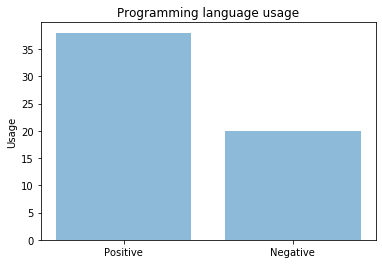

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
positive = sum([1 for x in sentiments if x == 'Positive'])
negative = sum([1 for x in sentiments if x == 'Negative'])
performance = [positive, negative]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

### Further Visualization

For a slightly more colorful view at the overall data, we can use a wordcloud module!

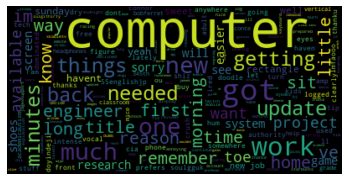

In [ ]:
from wordcloud import WordCloud
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

overallWords = ' '

for entry in data:
    for word in entry:
        overallWords += word + ' '

wordcloud = WordCloud().generate(overallWords)

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()